In [2]:
from PIL import Image

for i in range(1, 414):
    num = str(i).zfill(3)
    im = Image.open(f"1. Original Images/a. Training Set/IDriD_{num}.jpg")
    resized_image = im.resize((1440, 960))
    resized_image.save(f"resized/a_training/IDriD_{num}.jpg")

In [4]:
from PIL import Image

for i in range(1, 104):
    num = str(i).zfill(3)
    im = Image.open(f"1. Original Images/b. Testing Set/IDriD_{num}.jpg")
    resized_image = im.resize((1440, 960))
    num2 = 413 + i
    resized_image.save(f"resized/b_testing/IDriD_{num2}.jpg")

In [16]:
import pandas as pd

training = pd.read_csv("2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv")
testing = pd.read_csv("2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv")

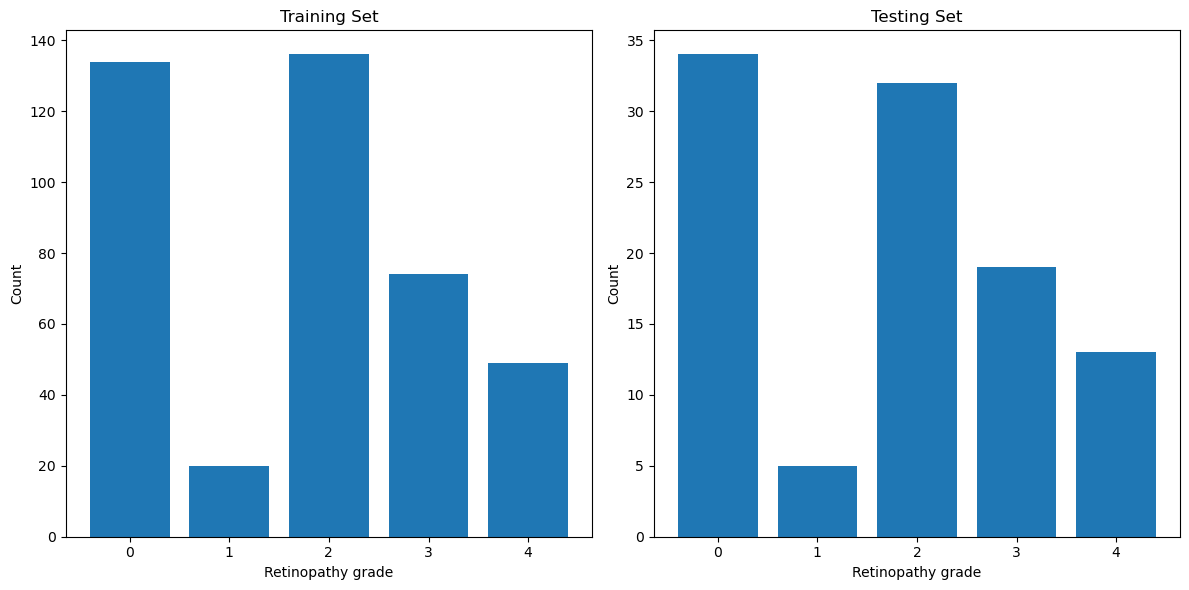

In [20]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

grade_counts_train = training["Retinopathy grade"].value_counts().sort_index()
grade_counts_test = testing["Retinopathy grade"].value_counts().sort_index()

ax1.bar(grade_counts_train.index, grade_counts_train.values)
ax1.set_xlabel("Retinopathy grade")
ax1.set_ylabel("Count")
ax1.set_title("Training Set")

ax2.bar(grade_counts_test.index, grade_counts_test.values)
ax2.set_xlabel("Retinopathy grade")
ax2.set_ylabel("Count")
ax2.set_title("Testing Set")

plt.tight_layout()

plt.show()

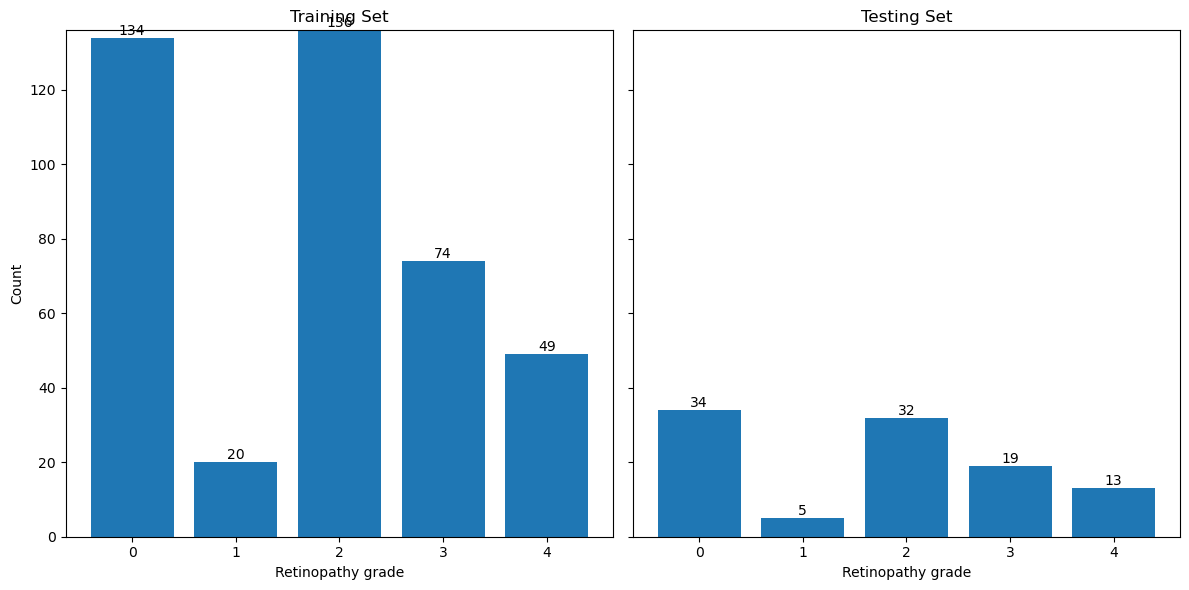

In [21]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

bars_train = ax1.bar(grade_counts_train.index, grade_counts_train.values)
ax1.set_xlabel("Retinopathy grade")
ax1.set_ylabel("Count")
ax1.set_title("Training Set")
for bar in bars_train:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2, height, height, ha="center", va="bottom"
    )

bars_test = ax2.bar(grade_counts_test.index, grade_counts_test.values)
ax2.set_xlabel("Retinopathy grade")
ax2.set_title("Testing Set")
for bar in bars_test:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2, height, height, ha="center", va="bottom"
    )

max_y = max(max(grade_counts_train.values), max(grade_counts_test.values))
ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()

plt.show()

In [ ]:
# Change image names
testing["Image name"] = testing["Image name"].apply(
    lambda x: "IDRiD_" + str(int(x.split("_")[1]) + 413).zfill(3)
)
testing["split_type"] = "testing"

training = training[["Image name", "Retinopathy grade", "Risk of macular edema "]]
training["split_type"] = "training"

In [48]:
combined = pd.concat([training, testing], ignore_index=True)
combined.to_csv("resized/test_split_image_key.csv")